In [5]:
from algorithms.root_to_liveql import root_to_liveql
from eflint.eflint_lib import EF
from eflint.eflint_parser import get_node_to_type_map, create_graph, get_parameter_facts
from eflint.save_and_open import save_dsl_to_file, open_liveql
from graph_visualizer import visualize_graph

In [40]:
ef = EF()
type_res = ef.types()
fact_res = ef.facts()
node_name_to_node = create_graph(type_res)
node_to_type_map = get_node_to_type_map(type_res)
parameter_facts = get_parameter_facts(type_res, fact_res)
root = node_name_to_node["[Recht op IIT 591]"]

# What do they mean?
These are Dutch income supplement system. There are two versions, with and without kids.
- [Recht op IIT 51] -> Single with kids
- [Recht op IIT 231] -> Single no kids
- [Recht op IIT 591] -> Not single, 0 or more kids

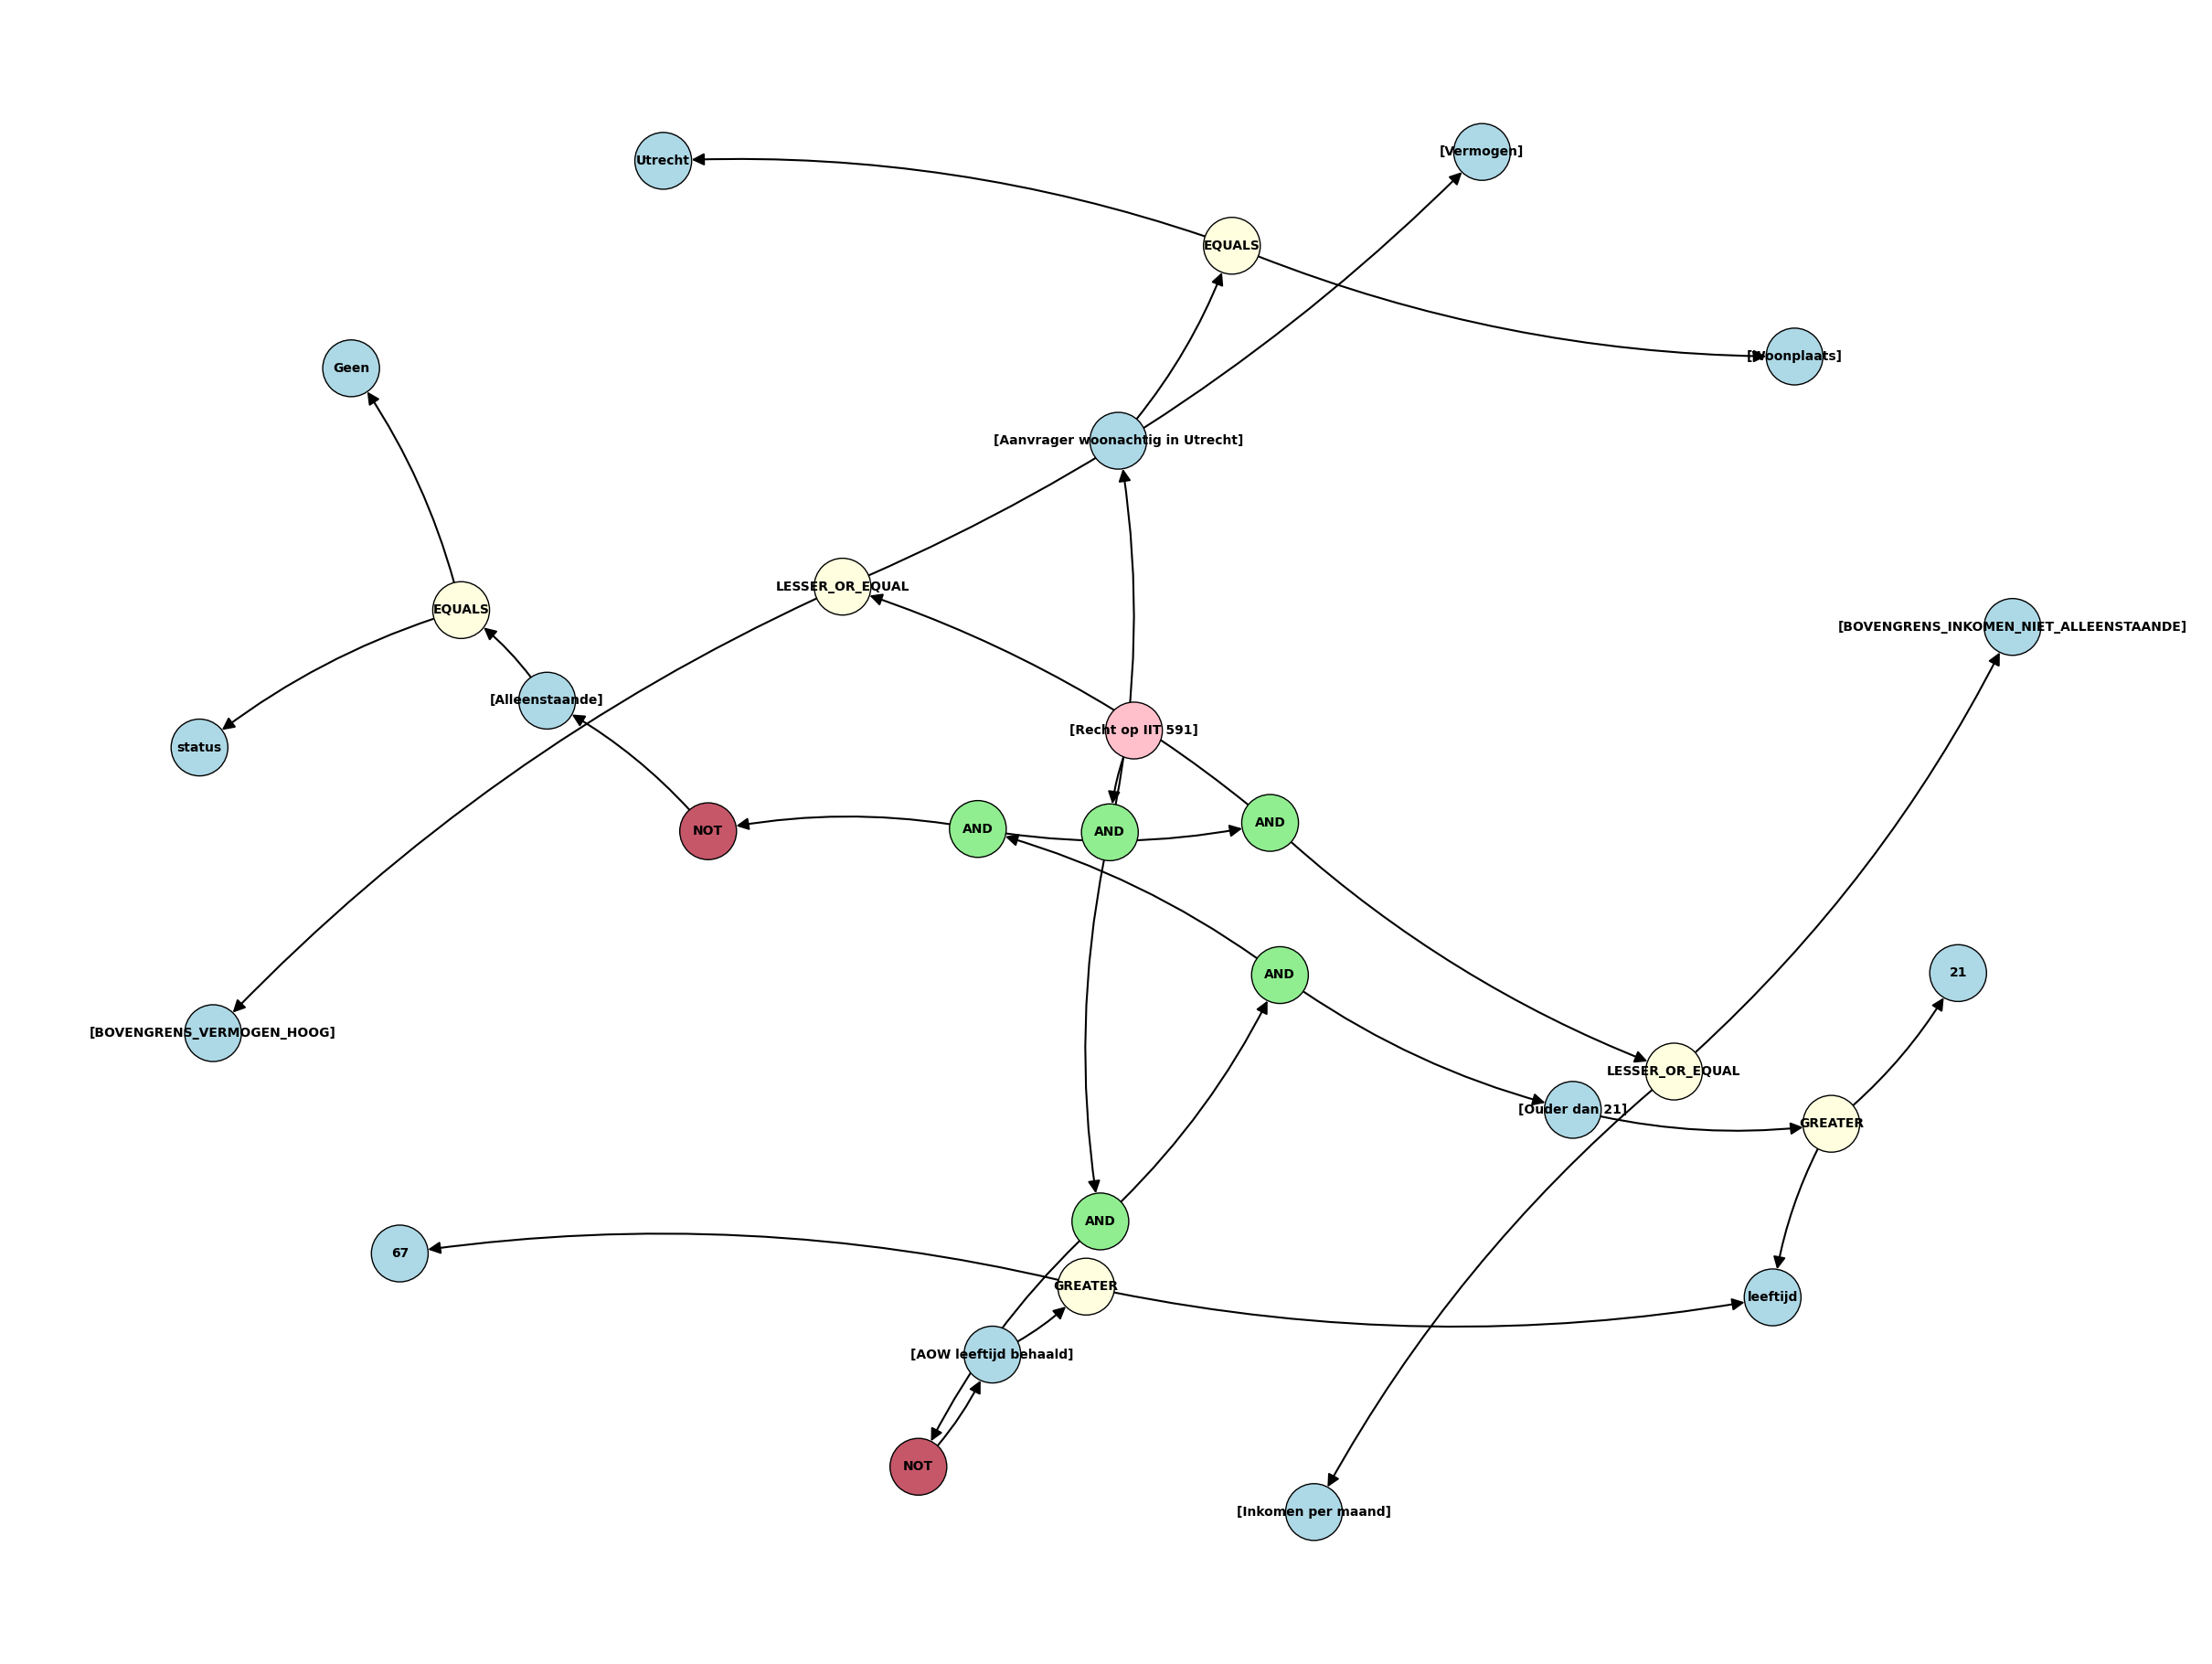

<module 'matplotlib.pyplot' from '/Users/tiemfah/Projects/eFLINTAnswers/.venv/lib/python3.13/site-packages/matplotlib/pyplot.py'>

In [41]:
visualize_graph(root)

In [42]:
dsl_content = root_to_liveql(root, node_to_type_map, parameter_facts)
print(dsl_content)

form Recht_op_IIT_591Form {
	"BOVENGRENS_INKOMEN_ALLEENSTAANDE" BOVENGRENS_INKOMEN_ALLEENSTAANDE:int(1207)
	"BOVENGRENS_INKOMEN_NIET_ALLEENSTAANDE" BOVENGRENS_INKOMEN_NIET_ALLEENSTAANDE:int(1724)
	"BOVENGRENS_VERMOGEN_HOOG" BOVENGRENS_VERMOGEN_HOOG:int(12450)
	"BOVENGRENS_VERMOGEN_LAAG" BOVENGRENS_VERMOGEN_LAAG:int(6225)
	"What is the actor status?" status: str
	"How many Inkomen per maand does the actor have?" Inkomen_per_maand: int
	"What is the actor Woonplaats?" Woonplaats: str
	"How many leeftijd does the actor have?" leeftijd: int
	"How many Vermogen does the actor have?" Vermogen: int
	if (Woonplaats == "Utrecht" && !(leeftijd > 67) && leeftijd > 21 && !(status == "Geen") && Inkomen_per_maand <= BOVENGRENS_INKOMEN_NIET_ALLEENSTAANDE && Vermogen <= BOVENGRENS_VERMOGEN_HOOG) {
		"Property Recht op IIT 591 holds" result: bool(true)
	}
	if (Woonplaats != "Utrecht" || (!(leeftijd <= 67) || (leeftijd <= 21 || (!(status != "Geen") || (Inkomen_per_maand > BOVENGRENS_INKOMEN_NIET_ALLEENS

In [43]:
save_dsl_to_file(dsl_content, "income supplement", "/Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql")
open_liveql()

DSL saved to /Users/tiemfah/Projects/LiveQL/bin/nl/cwi/swat/liveql/examples/eflint.ql
+(0, computed("BOVENGRENS_INKOMEN_ALLEENSTAANDE", BOVENGRENS_INKOMEN_ALLEENSTAANDE, integer))
+(0, computed("BOVENGRENS_INKOMEN_NIET_ALLEENSTAANDE", BOVENGRENS_INKOMEN_NIET_ALLEENSTAANDE, integer))
+(0, computed("BOVENGRENS_VERMOGEN_HOOG", BOVENGRENS_VERMOGEN_HOOG, integer))
+(0, computed("BOVENGRENS_VERMOGEN_LAAG", BOVENGRENS_VERMOGEN_LAAG, integer))
+(0, answerable("What is the actor status?", status, string))
+(0, answerable("How many Inkomen per maand does the actor have?", Inkomen_per_maand, integer))
+(0, answerable("What is the actor Woonplaats?", Woonplaats, string))
+(0, answerable("How many leeftijd does the actor have?", leeftijd, integer))
+(0, answerable("How many Vermogen does the actor have?", Vermogen, integer))
+(0, ifThen(nl.cwi.swat.liveql.ast.expr.And@14a643e5, [computed("Property Recht op IIT 591 holds", result, boolean)]))
+(0, ifThen(nl.cwi.swat.liveql.ast.expr.Or@12a1329c, [com

2025-06-05 11:06:23.969 java[63481:2715883] TSM AdjustCapsLockLEDForKeyTransitionHandling - _ISSetPhysicalKeyboardCapsLockLED Inhibit
